### Import Necessary Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Data Collection & Processing

### Load the Titanic Dataset


In [ ]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Drop Unnecessary Columns

In [ ]:
titanic_data = titanic_data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)

### Handling Missing Values

In [ ]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Encode Categorical Variables

In [ ]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

### Replace Infinity values with NaN

In [ ]:
titanic_data.replace([np.inf, -np.inf], np.nan, inplace=True)

### Drop rows with NaN values

In [ ]:
titanic_data.dropna(inplace = True)

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


### Data Analysis

In [ ]:
titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Data Visualization

<Axes: xlabel='Pclass', ylabel='Survived'>

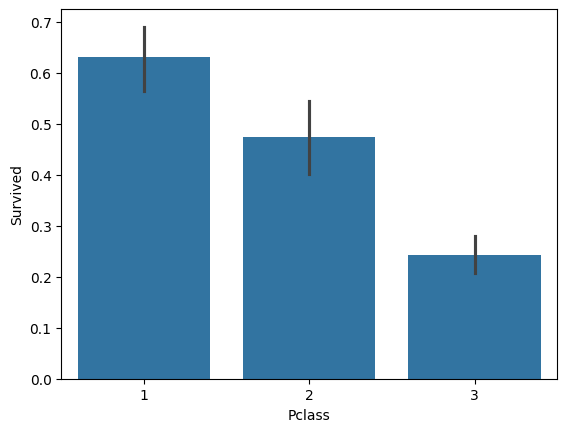

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data)

<Axes: xlabel='Sex', ylabel='Survived'>

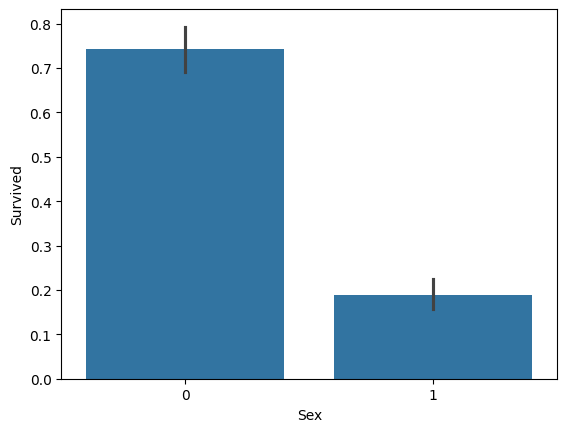

In [ ]:
sns.barplot(x='Sex', y='Survived', data=titanic_data)

### Splitting Dataset into Train and Test

In [ ]:
predictors = titanic_data.drop(['Survived'], axis=1)
target = titanic_data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(
	predictors, target, test_size=0.2, random_state=0)

### Testing the Accuracy of each model

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_val)
sgd.score(x_train, y_train)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
print(acc_sgd)

67.56


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_prediction = random_forest.predict(x_val)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print(acc_random_forest)

98.17


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_val)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
print(acc_log)

80.2


In [ ]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_val)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
print(acc_gaussian)

78.93


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_val)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
print(acc_knn)

83.85


In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_val)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
print(acc_perceptron)

70.93


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
print(acc_linear_svc)

79.78


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_val)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

98.17


### Train a Random Forest Classifer

In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

### Make Predictions on the Test Set

In [ ]:
y_pred = clf.predict(x_val)

### Evaluate the Model

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

Accuracy: 82.12%
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

